### Digit Recognizer

* Interactive Intro to Dimensionality Reduction(차원감소??)
 - https://www.kaggle.com/arthurtok/interactive-intro-to-dimensionality-reduction

### Introduction
특히 PCA(주 구성 요소 분석), LDA(선형 분류 분석), TSNE(T-분산 확률 이웃 포함)와 같은 Big 3의 차원 감소 방법의 장점을 다루는 많은 노트북이 이미 존재한다. 이것들 중 꽤 많은 부분이 서로 비교했지만, 한번에 3가지 모두를 모은 것은 거의 없다. 따라서, 이 노트북은 이 3가지 방법에 대해서 직관적으로 표현하기위해 그리는 것과 같은 기본적인 설명 제공과 보다 직관적으로 묘사하는 것을 목적으로 한다. 이 챕터는 다음과 같이 구성되어 있다.

1. Principal Component Analysis(PCA, 주 구성 요소 분석) - Unsupervised, linear method
2. Linear Discriminant Analysis(LDA, 선현 분류 분석) - Supervised, linear method
3. t-distributed Stochastic Neighbour Embedding(t-SNE) - Nonlinear, probabilistic method

* 신경망 (Neural Network) 에서 학습기가 분류 (classification) 하려는 대상이 자갈과 모래라는 것을 미리 알고서 훈련예 (training example) 로서 학습시켜 어떤 대상이 자갈에 속하는지 모래에 속하는지를 분류하는 것이 지도학습 (supervised learning)이다. 반면에 분류하려는 대상에 대한 어떤 정보도 주어지지 않고 학습기로 하여금 그것이 자갈인지 또는 모래인지 또는 그 밖의 어떤 것인지를 분류하는 것이 자율학습 (unsupervised learning)
* t-SNE : 데이터의 차원 축소에 사용되는 기계 학습 알고리즘. 고차원 데이터를 특히 2, 3차원 등으로 줄여 가시화하는데에 유용하게 사용. 비슷한 데이터는 선택될 확률이 매우 높지만 다른 데이터끼리는 선택될 확률이 매우 낮도록 설계된다.(http://bit.ly/2eQFos4)



In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py       # Python graphing library https://plot.ly/python/
py.init_notebook_mode(connected=True)    # Online 상태에서 실행
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns              # statistical data visualization  // https://seaborn.pydata.org/
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Import the 3 dimensionality reduction methods
from sklearn.manifold import TSNE        # Manifold learning is an approach to non-linear dimensionality reduction
from sklearn.decomposition import PCA    # Linear dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# linear and a quadratic decision surface, respectively

*차원의 저주와 차원 감소*
"차원의 저주(Curse of Dimensionality)" 라는 용어는 특히 PCA, LDA, TSNE가 혼합될 때 자주 발생해왔다. 이 문구는 우리가 매우 고차원 공간에서 다룰 때 어떻게 우리가 완벽하고 신뢰 할 수 있는 머신러닝방법이 갑자기 성능이 나쁜지를 말한다. 그러나 이 3개의 두문자어는 정확히 무엇을 할까? 이것은 본질적으로 차원감소에 사용되는 변형 방법이다. 따라서 우리가 관련 정보의 대부분을 유지하면서 더 고차원 공간에 낮은 차원으로 데이터를 나타낼 수 있다면, 우리의 학습 방법이 훨씬 쉬워질것이다.

### MNIST Dataset
대화식 가이드의 목적을 위해, MNIST(Mixed National Institude of Standards and Technology) 컴퓨터 비전 숫자 데이터 셋은 단순성과 놀랍게 깊고 유익한 연구를 위해 부분적으로 선택되었다. 이제 training data 를 로드하고 가지고 있는 것을 살펴보자

In [7]:
train = pd.read_csv('./DigitRecognizer/train.csv')
# train.shape           # (42000, 785)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MNIST 집합은 42000 행과 785 열로 구성된다. 28*28 픽섹의 숫자 이미지(784개 컬럼 차지)와 기본적으로 행 단위 기여가 1 또는 9를 제공하는지를 나타내는 클래스 레이블인 1개의 추가 라벨 컬럼이 있다. 각 행의 요소는 1과 0 사이의 값을 포함하고, 각 픽셀의 강도를 나타낸다. 100개의 이런 열이 포함된 전통적인 Pearson 상관관계도표 에서 의미있는 견해를 얻을 수 있는지 알아보자.

* Pearson 상관관계도표*

Figure(504x432)
Axes(0.125,0.125;0.775x0.755)


/Users/s0wnd/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix



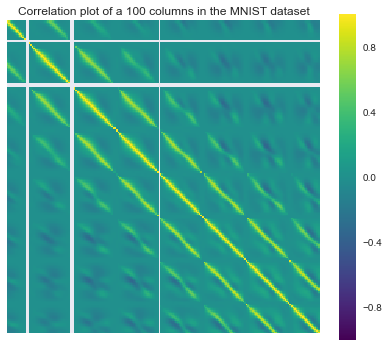

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))
print(f)   # Figure(504x432)
print(ax)  # Axes(0.125,0.125;0.775x0.755)
plt.title('Correlation plot of a 100 columns in the MNIST dataset')
# Draw the heatmap using seaborn
sns.heatmap(train.ix[:,100:300].astype(float).corr(),linewidths=0, square=True, cmap="viridis", xticklabels=False, yticklabels= False, annot=True)